# Практическая работа №3: Кластерный анализ
Выполнил студент гр. 0373 Закарьяев Эльдар. Вариант №8

## Цель работы
Освоение основных понятий и некоторых методов кластерного анализа,
в частности, метода k-means и метода поиска сгущений.


## Основные теоретические положения

####Нормализация даных:
Один из самых распространенных методов - minmax. Он отображает множество точек в единичный квадрат (0, 0) - (1, 1), где 1 - максимальное значение признака, 0 - минимальное.
$X_N = \frac{X-X_{min}}{X_{max}-X_{min}}$

####Неотрицательная вещественная функция $d(x,y)$ называется функцией расстояния, если:
1. $d(x,y) \ge 0$
2. $d(x,y)=d(y,x)$
3. $d(x,y) \le d(x,z)d(z,y)$

Функция Евклидова расстояния: $d(x,y) = \sqrt{\sum^n_i{(x_i-y_i)^2}}$

####Метод кластеризации K-Means:
Вход: совокупность точек D, количество кластеров k
1. Случайно выбирается $k$ точек - начальных центроидов кластеров
2. Каждый объект совокупности относится к ближайшему центроиду
3. Центроид каждого кластера пересчитывается как центр масс точек кластера
4. Если центроиды не отличимы от полученных на предыдущем шаге, то алгоритм завершил работу, иначе перехо к п.2

####Метод кластеризации K-Medoids:
Вход: совокупность точек D, количество кластеров k
1. Из совокупности случайно выбирается $k$ точек - начальных центроидов кластеров
2. Каждый объект совокупности относится к ближайшему центроиду
3. Центроид каждого кластера пересчитывается как точка находящаяся на минимальном расстоянии от остальных точек кластера
4. Если центроиды не отличимы от полученных на предыдущем шаге, то алгоритм завершил работу, иначе перехо к п.2

####Метод локта поиска оптимального количества кластеров:

Алгоритм кластеризации многократно исполняется с увеличением количествы выделяемых кластеров. Для каждой итерации высчитываются разбросы кластеров:

$W_{C_j}=\sum_{x \in C_j}{(x-x_{C_j})^2}$, 

$C_j$ - множество элементов кластера $j$, $x_{C_j}$ - центр кластера $j$

Разброс представляется на графике. По нему определяется при каком количестве кластеров дальнейшее их увеличение уменьшает разброс с меньшей степенью. На графике это выглядит как перегиб.

####Метод поиска сгущения FOREL:
Вход: совокупность точек X, радиус поиска R
1. u := X
2. $x_c$ := randomFrom(u)
3. K := selectHypersphere(center=$x_c$, radius=R, from=u)
4. $\widetilde{x}_c$ := $\frac{1}{|K|}\sum_{x \in K}{x}$
5. if ($x_c \neq \widetilde{x}_c$) $x_c$ := $\widetilde{x}_c$, goto 3
6. u := u \ K
7. yield return Claster(center=$x_c$, content=K)
8. if ($|u| > 0$) goto 2

####Радиус может быть выбран в пределах: $R_{min}<R<R_{max}$

$R_{min} = min\{d(x,y) > 0 | (x,y) \in X\}$

$R_{max} = max\{d(x,y) | (x,y) \in X\}$

####Метод кластеризации K-Means++:
Вход: совокупность точек D, количество кластеров k
1. Случайно выбирается начальный центроид первого кластера
2. Следующий начальный центроид выбирается из точек совокупности с вероятностью пропорциональной расстоянию точки до ближайщего центроида. То есть с наибольшей вероятностью выбирается точка максимально отдаленная от уже выбранных центроидов
3. Повторять шаг 2 k-1 раз, чтобы получить k начальных центроидов
4. Выполнить K-Means, используя выбранные центроиды

## Постановка задачи
Дано конечное множество из объектов, представленных двумя признаками (в качестве этого множества принимаем исходную двумерную выборку, сформированную ранее в практической работе №2). Выполнить разбиение исходного множества объектов на конечное число подмножеств
(кластеров) с использованием метода k-means и метода поиска сгущений. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import random

In [47]:
def parseToFloat(string):
  return float(string.replace("$", "").replace("M", ""))

sample = pd.read_csv("/content/moviesSample.csv")
X = 'rating'
Y = 'gross_earn'
N = len(sample)
eps = 0.0001

for i, row in sample.iterrows():
  sample.loc[i, Y] = parseToFloat(row[Y])

sample[Y] = pd.to_numeric(sample[Y])
sample[X] = pd.to_numeric(sample[X])

sample

,rating,gross_earn
0,9.0,377.85
1,7.8,936.66
2,7.2,117.72
3,7.2,144.84
4,8.4,0.28
...,...,...
104,7.5,0.96
105,7.4,0.60
106,5.1,20.02
107,7.0,4.76


###Задание 1
Нормализовать множество точек из предыдущей работы, отобразить полученное множество

In [48]:
sample=(sample-sample.min())/(sample.max()-sample.min())
sample

,rating,gross_earn
0,1.000000,0.403389
1,0.785714,1.000000
2,0.678571,0.125662
3,0.678571,0.154617
4,0.892857,0.000278
...,...,...
104,0.732143,0.001004
105,0.714286,0.000619
106,0.303571,0.021353
107,0.642857,0.005061


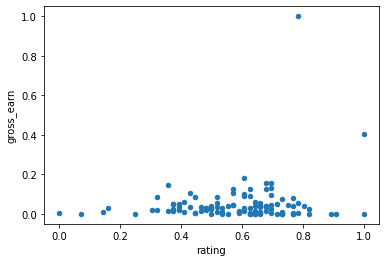

In [49]:
sample.plot.scatter(x=X, y=Y)

###Задание 2
Определить «грубую» верхнюю оценку количества кластеров $\widetilde{k}$.

In [50]:
kMax = int(np.floor(np.sqrt(N/2)))
print("Грубая верхняя оценка количества кластеров:", kMax)

Грубая верхняя оценка количества кластеров: 7


###Задание 3
Реализовать алгоритм k-means. Отобразить полученные кластеры,
каждый кластер выделить разным цветом или маркером, отметить
центроиды.

In [51]:
def CheckCentroids(M, prevM, e):
  sum = 0
  for i in range(0, len(M)):
    sum += EuclidDisatnce(M[i], prevM[i])
  return sum <= e

def EuclidDisatnce(p1, p2):
  return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def GetClosestCentroidIndex(x, M):
  min = 0
  for i, m in enumerate(M):
    if(EuclidDisatnce(x, M[min]) > EuclidDisatnce(x, m)):
      min = i
  return min

def GetCentroids(C, D):
  M = []
  for i, c in enumerate(C):
    M.append((0, 0))
    for j in c:
      x = D[j]
      M[i] = (M[i][0] + x[0]/len(c), M[i][1] + x[1]/len(c))
  return M


def KMeans(D, k, e):
  t = 0
  M = [(D[i, 0], D[i, 1]) for i in range(k)]
  while(True):
    t += 1
    C = [[] for j in range(0, k)]
    for i, x in enumerate(D):
      j = GetClosestCentroidIndex(x, M)
      C[j].append(i)
    prevM = M
    M = GetCentroids(C, D)
    if(CheckCentroids(M, prevM, e)):
      return (C, M)

C, M = KMeans(sample.values, kMax, eps)
print('Кластеры: ', C)
print('Центры: ', M)

Кластеры:  [[0], [1], [13, 20, 21, 28, 32, 34, 35, 42, 44, 51, 53, 63, 65, 67, 68, 71, 72, 75, 77, 78, 81, 82, 83, 89, 92, 93, 95, 97, 102, 103], [2, 3, 5, 6, 7, 8, 10, 11, 16, 31, 36, 38, 50], [4, 9, 14, 27, 29, 43, 55, 74], [12, 17, 18, 22, 23, 24, 25, 26, 30, 33, 37, 39, 40, 41, 45, 47, 49, 52, 54, 56, 58, 59, 60, 62, 66, 73, 80, 84, 86, 88, 90, 98, 99, 100, 104, 105, 107, 108], [15, 19, 46, 48, 57, 61, 64, 69, 70, 76, 79, 85, 87, 91, 94, 96, 101, 106]]
Центры:  [(1.0, 0.40338870857533315), (0.7857142857142858, 1.0), (0.5029761904761905, 0.03032008028698326), (0.638736263736264, 0.1187419515912854), (0.8526785714285714, 0.015615658097027672), (0.6846804511278194, 0.021396469800226563), (0.29662698412698413, 0.03359763504536309)]


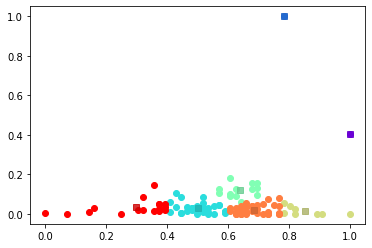

In [52]:
def Darken(color, k):
  return color * k

def Draw(C, M, D):
  k = len(M)
  colors=cm.rainbow(np.linspace(0,1,k))
  for i in range(0, k):
    for j in C[i]:
      x = D[j][0]
      y = D[j][1]
      plt.plot(x, y, 'o', c=colors[i])
    x = M[i][0]
    y = M[i][1]
    plt.plot(x, y, 's', c=Darken(colors[i], 0.8))
    

Draw(C, M, sample.values)

Элементы кластеров отображены кругами. Центры кластеров отображены более темными квадратами. Кластеры разделены по цветам.

###Задание 4
Реализовать алгоритм k-medoids. Отобразить полученные кластеры, каждый кластер выделить разным цветом или маркером, отметить центроиды.

Кластеры:  [[0], [1], [2, 3, 5, 6, 8, 10, 17, 18, 24, 25, 26, 30, 31, 33, 36, 40, 41, 52, 56, 108], [15, 19, 21, 42, 46, 48, 53, 57, 61, 64, 69, 70, 75, 76, 79, 81, 82, 85, 87, 89, 91, 93, 94, 96, 101, 103, 106], [4, 27, 74], [9, 12, 14, 23, 29, 43, 49, 55, 59, 60, 62, 99, 100, 104, 105], [7, 11, 13, 16, 20, 22, 28, 32, 34, 35, 37, 38, 39, 44, 45, 47, 50, 51, 54, 58, 63, 65, 66, 67, 68, 71, 72, 73, 77, 78, 80, 83, 84, 86, 88, 90, 92, 95, 97, 98, 102, 107]]
Центры:  [array([1.        , 0.40338871]), array([0.78571429, 1.        ]), array([0.69642857, 0.04309019]), array([0.30357143, 0.02135292]), array([1.        , 0.00117441]), array([7.14285714e-01, 6.19234711e-04]), array([0.64285714, 0.00506064])]


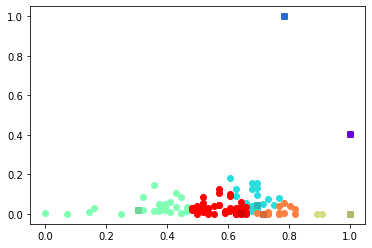

In [53]:
def GetMedoids(C, D):
  M = []
  for i, claster in enumerate(C):
    M.append((0, 0))
    minDist = np.inf
    for j in claster:
      point = D[j]
      dist = 0
      for p in claster:
        dist += EuclidDisatnce(D[p], D[j])
      if dist < minDist:
        M[i] = D[j]
  return M

def KMedoids(D, k, e):
  t = 0
  M = [(D[i, 0], D[i, 1]) for i in range(k)]
  while(True):
    t += 1
    C = [[] for j in range(0, k)]
    for i, x in enumerate(D):
      j = GetClosestCentroidIndex(x, M)
      C[j].append(i)
    prevM = M
    M = GetMedoids(C, D)
    if(CheckCentroids(M, prevM, e)):
      return (C, M)

C, M = KMedoids(sample.values, kMax, eps)
print('Кластеры: ', C)
print('Центры: ', M)
Draw(C, M, sample.values)

###Задание 5
Для каждого метода заполнить следующую таблицу, где значения $k$ изменяются от 1 до $\widetilde{k}$:


In [54]:
kTitle = "k"
centroidTitle = "Центроид кластера C_i"
volumeTitle = "Объем кластера C_i"
medoidsInfo = pd.DataFrame(columns=[kTitle, centroidTitle, volumeTitle])
meansInfo = pd.DataFrame(columns=[kTitle, centroidTitle, volumeTitle])

for k in range(1, kMax + 1):
  Cmeds, Mmeds = KMedoids(sample.values, k, eps)
  Cmeans, Mmeans = KMeans(sample.values, k, eps)
  for i in range(len(Mmeds)):
    medoidsInfo.loc[len(medoidsInfo)] = [k, np.round(Mmeds[i], 2), len(Cmeds[i])]
  for i in range(len(Mmeans)):
    meansInfo.loc[len(meansInfo)] = [k, np.round(Mmeans[i], 2), len(Cmeans[i])]

In [55]:
print("K-Medoids:")
display(medoidsInfo)

K-Medoids:


,k,Центроид кластера C_i,Объем кластера C_i
0,1,"[0.7, 0.04]",109
1,2,"[0.7, 0.04]",108
2,2,"[0.79, 1.0]",1
3,3,"[1.0, 0.4]",1
4,3,"[0.79, 1.0]",1
5,3,"[0.7, 0.04]",107
6,4,"[1.0, 0.4]",1
7,4,"[0.79, 1.0]",1
8,4,"[0.7, 0.04]",74
9,4,"[0.3, 0.02]",33


In [56]:
print("K-Means:")
display(meansInfo)

K-Means:


,k,Центроид кластера C_i,Объем кластера C_i
0,1,"[0.58, 0.05]",109
1,2,"[0.58, 0.04]",108
2,2,"[0.79, 1.0]",1
3,3,"[0.69, 0.05]",67
4,3,"[0.79, 1.0]",1
5,3,"[0.4, 0.03]",41
6,4,"[0.95, 0.1]",4
7,4,"[0.79, 1.0]",1
8,4,"[0.4, 0.03]",41
9,4,"[0.67, 0.04]",63


###Задание 6
С помощью метода локтя (для чётных вариантов) выявить для каждого метода
оптимальное количество кластеров.

In [57]:
wMeans = []
wMeds = []

for k in range(1, kMax + 1):
  Cmeds, Mmeds = KMedoids(sample.values, k, eps)
  Cmeans, Mmeans = KMeans(sample.values, k, eps)
  sum = 0
  for i in range(len(Mmeds)):
    for j in range(len(Cmeds[i])):
      sum += EuclidDisatnce(sample.values[Cmeds[i][j]], Mmeds[i])
  wMeds += [[k, sum]]
  sum = 0
  sum = 0
  for i in range(len(Mmeans)):
    for j in range(len(Cmeans[i])):
      sum += EuclidDisatnce(sample.values[Cmeans[i][j]], Mmeans[i])
  wMeans += [[k, sum]]

####K-Means:

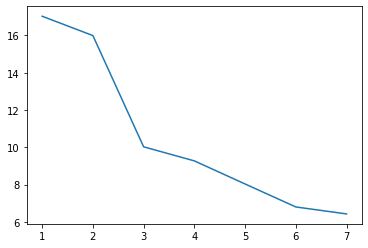

In [58]:
plt.plot([entry[0] for entry in wMeans], [entry[1] for entry in wMeans])

Для метода K-Means заметен перегиб при $k=3$. Это и есть искомое оптимальное количество кластеров.

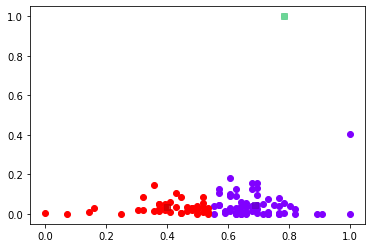

In [59]:
C, M = KMeans(sample.values, 3, eps)
Draw(C, M, sample.values)

####K-Medoids

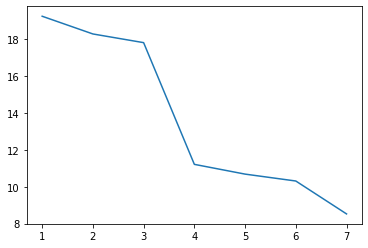

In [60]:
plt.plot([entry[0] for entry in wMeds], [entry[1] for entry in wMeds])

Для метода K-Medoids заметен перегиб при $k=4$. Это и есть искомое оптимальное количество кластеров.

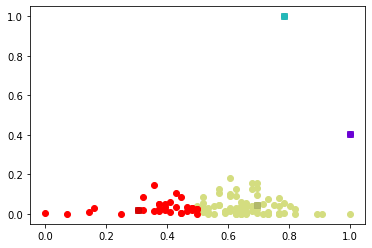

In [61]:
C, M = KMedoids(sample.values, 4, eps)
Draw(C, M, sample.values)

###Задание 7, 8
Реализовать алгоритм поиска сгущений при различных радиусах
𝑅, отобразить полученные кластеры, выделить каждый кластер
разным цветом или маркером, отметить центроиды. Результаты
представить в виде таблицы.

Проверить чувствительность метода поиска сгущений к погрешностям. Сделать выводы.


In [62]:
def SelectSphere(center, r, values):
  return ([x for x in values if EuclidDisatnce(center, x) <= r])

def DeselectSphere(center, r, values):
  return [x for x in values if EuclidDisatnce(center, x) > r]

def GetCenter(values):
  center = (0, 0)
  for x in values:
    center = (center[0] + x[0], center[1] + x[1])
  return (center[0]/len(values), center[1]/len(values))

def Equals(p1, p2, eps):
  return EuclidDisatnce(p1, p2) < eps

def ChooseRandom(u):
  return random.choice(u)

def Forel(X, r, chooseFirstCentroid):
  u = X
  C = []
  M = []
  while len(u) > 0:
    centroid = chooseFirstCentroid(u)
    while True:
      k = SelectSphere(centroid, r, u)
      c = GetCenter(k)
      if Equals(c, centroid, eps) is False:
        centroid = c
      else:
        C += [k]
        M += [centroid]
        u = DeselectSphere(centroid, r, u)
        break
  return (C, M)

In [63]:
def DrawByValues(C, M):
  k = len(M)
  colors=cm.rainbow(np.linspace(0,1,k))
  for i in range(0, k):
    for j in C[i]:
      x = j[0]
      y = j[1]
      plt.plot(x, y, 'o', c=colors[i])
    x = M[i][0]
    y = M[i][1]
    plt.plot(x, y, 's', c=Darken(colors[i], 0.8))

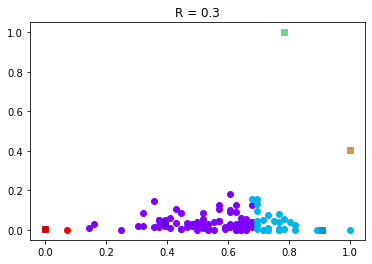

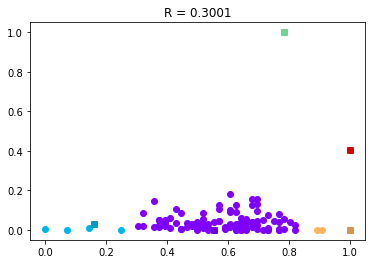

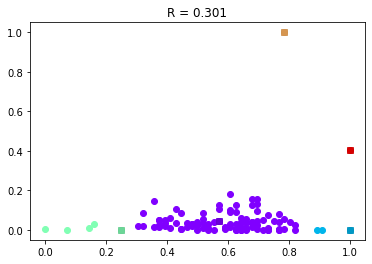

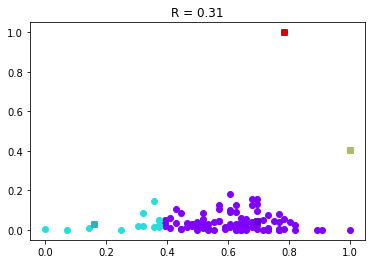

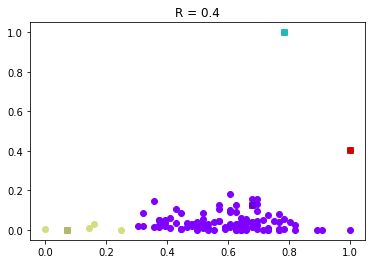

In [64]:
R = [0.3, 0.3001, 0.301, 0.31, 0.4]

rTitle = "r"
centroidTitle = "Центроид кластера C_i"
volumeTitle = "Объем кластера C_i"
info = pd.DataFrame(columns=[rTitle, centroidTitle, volumeTitle])

for r in R:
  C, M = Forel(sample.values, r, ChooseRandom)
  for i in range(len(M)):
    info.loc[len(info)] = [r, np.round(M[i], 2), len(C[i])]
  plt.title(f"R = {r}")
  DrawByValues(C, M)
  plt.show()

In [65]:
info

,r,Центроид кластера C_i,Объем кластера C_i
0,0.3000,"[0.39, 0.04]",77
1,0.3000,"[0.91, 0.0]",28
2,0.3000,"[0.79, 1.0]",1
3,0.3000,"[1.0, 0.4]",1
4,0.3000,"[0.0, 0.0]",2
5,0.3001,"[0.55, 0.0]",99
6,0.3001,"[0.16, 0.03]",5
7,0.3001,"[0.79, 1.0]",1
8,0.3001,"[1.0, 0.0]",3
9,0.3001,"[1.0, 0.4]",1


Видно, что любое малейшее изменение радиуса сильно влияло на кластеризацию. Можно предположить, что это из-за случайного выбора центроида первого порядка. Можно это проверить, исключив случайность из метода.

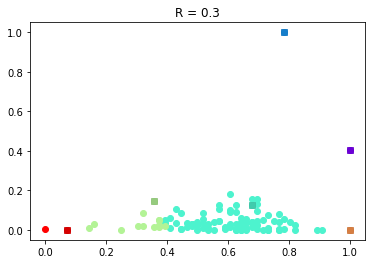

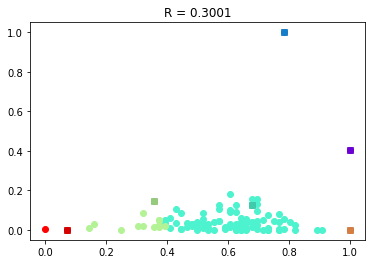

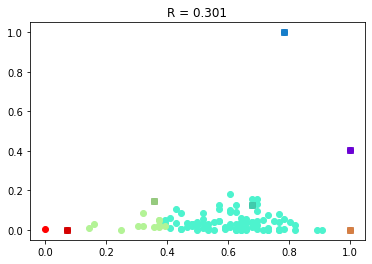

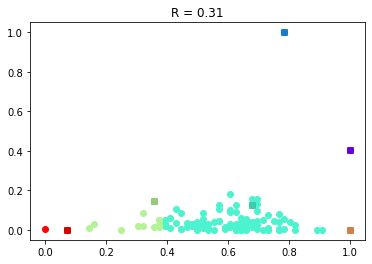

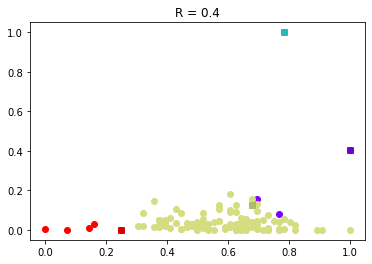

In [66]:
info = pd.DataFrame(columns=[rTitle, centroidTitle, volumeTitle])

def ChooseFirst(u): # Выбор первого элемента из оставшихся, вместо случайного
  return u[0]

for r in R:
  C, M = Forel(sample.values, r, ChooseFirst)
  for i in range(len(M)):
    info.loc[len(info)] = [r, np.round(M[i], 2), len(C[i])]
  plt.title(f"R = {r}")
  DrawByValues(C, M)
  plt.show()

In [67]:
info

,r,Центроид кластера C_i,Объем кластера C_i
0,0.3000,"[1.0, 0.4]",1
1,0.3000,"[0.79, 1.0]",1
2,0.3000,"[0.68, 0.13]",90
3,0.3000,"[0.36, 0.15]",14
4,0.3000,"[1.0, 0.0]",1
5,0.3000,"[0.07, 0.0]",2
6,0.3001,"[1.0, 0.4]",1
7,0.3001,"[0.79, 1.0]",1
8,0.3001,"[0.68, 0.13]",90
9,0.3001,"[0.36, 0.15]",14


Действительно, после исключения случайного выбора центроида первого порядка малые изменения радиуса в пределах 0.01 почти не влияют на результат кластеризации.

Из этого можно сделать вывод, что метод устойчив к погрешностям, если не учитывать фактор случайного выбора первого центроида.

###Задание 9
Сравнить методы. Сделать выводы.

Методы K-Means и K-Medoids дают крайне похожие результаты, что обоснованно схожестью их алгоритмов. При выборе одного из них значение будет иметь только требуемый формат выходных данных.

Метод FOREL при $R=0.3$ дал результаты, несколько похожие на кластеризации K-Means и K-Medoids при оптимальных $k$. Все методы выделили 2 больших кластера и несколько кластеров по 1-2 точки.

Наиболее наглядным среди результатов выглядит кластеризация K-Medoids, так как она разделила все скопление точек "снизу" на 2 кластера, в отличие от FOREL, и 2 сильно отдаленные точки выделила в разные кластеры, в отличие от K-Means.

###Задание 10
Реализовать модификацию k-means++. Объяснить её приемущества. Сравнить с обычным методом k-means.

K-Means++ в отличие от K-Means имеет расширенную стадию инициализации начальных центроидов. Тогда как в K-Means они как правило выбираются просто случайно, в K-Means++ центроиды выбираются так, чтобы они находились на максимальном друг от друга расстоянии. Это должно позволить более равномерно разделить кластеры.

In [72]:
def GetNextCenter(M, D):
  iMax = -1
  dMax = -1
  for i in range(len(D)):
    x = D[i]
    m = GetClosestCentroidIndex(x, M)
    if(EuclidDisatnce(x, M[m]) > dMax):
      dMax = EuclidDisatnce(x, M[m])
      iMax = i
  return D[iMax]

def InitCenters(D, k):
  M = [D[0]]
  for i in range(1, k):
    M += [GetNextCenter(M, D)]
  return M
      

def KMeansPP(D, k, e):
  t = 0
  M = InitCenters(D, k)
  while(True):
    t += 1
    C = [[] for j in range(0, k)]
    for i, x in enumerate(D):
      j = GetClosestCentroidIndex(x, M)
      C[j].append(i)
    prevM = M
    M = GetCentroids(C, D)
    if(CheckCentroids(M, prevM, e)):
      return (C, M)

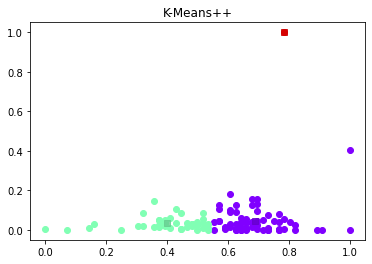

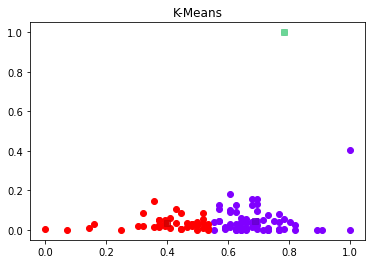

In [76]:
C, M = KMeansPP(sample.values, 3, eps)
plt.title("K-Means++")
Draw(C, M, sample.values)
plt.show()

C, M = KMeans(sample.values, 3, eps)
plt.title("K-Means")
Draw(C, M, sample.values)
plt.show()

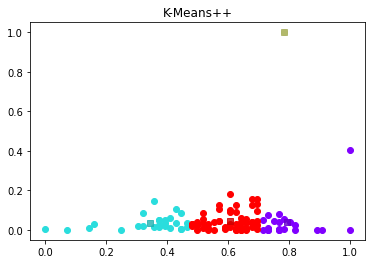

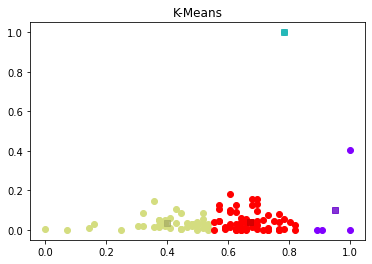

In [77]:
C, M = KMeansPP(sample.values, 4, eps)
plt.title("K-Means++")
Draw(C, M, sample.values)
plt.show()

C, M = KMeans(sample.values, 4, eps)
plt.title("K-Means")
Draw(C, M, sample.values)
plt.show()

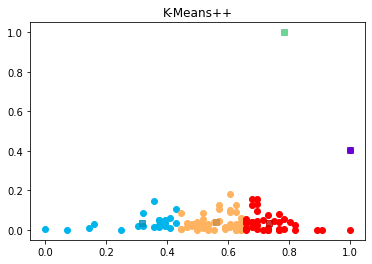

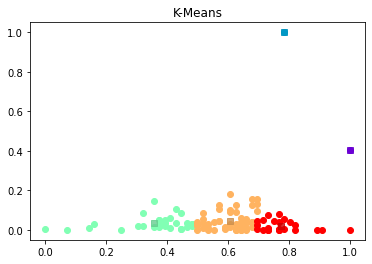

In [78]:
C, M = KMeansPP(sample.values, 5, eps)
plt.title("K-Means++")
Draw(C, M, sample.values)
plt.show()

C, M = KMeans(sample.values, 5, eps)
plt.title("K-Means")
Draw(C, M, sample.values)
plt.show()

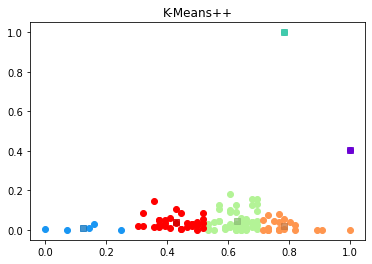

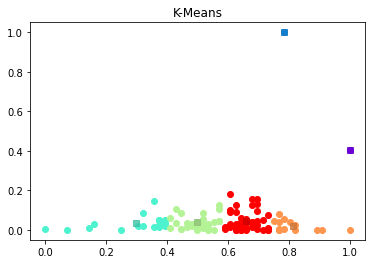

In [79]:
C, M = KMeansPP(sample.values, 6, eps)
plt.title("K-Means++")
Draw(C, M, sample.values)
plt.show()

C, M = KMeans(sample.values, 6, eps)
plt.title("K-Means")
Draw(C, M, sample.values)
plt.show()

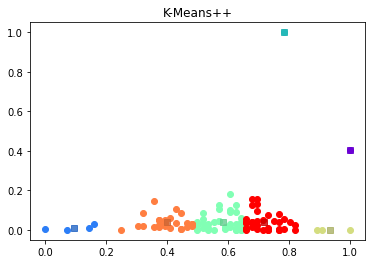

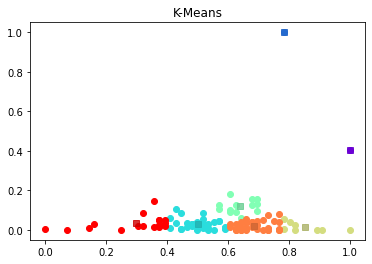

In [80]:
C, M = KMeansPP(sample.values, 7, eps)
plt.title("K-Means++")
Draw(C, M, sample.values)
plt.show()

C, M = KMeans(sample.values, 7, eps)
plt.title("K-Means")
Draw(C, M, sample.values)
plt.show()

При оптимальном количестве кластеров $k=3$ обычная и модифицированная версии алгоритма выдали одинаковые результаты. Единственной разницей стал порядок кластеров (желтый и циановый кластеры поменялись местами)

При $k=4$ заметны отличия в формировании красного и фиолетового кластеров. По субъективным ощущениям немодифицированный алгоритм предоставил более наглядную кластеризацию, так как фиолетовый и красный кластеры у K-Means не имеют "смежных" точек.

При $k=5$ есть некоторые отличия в распределении точек между кластерами, но общий их вид оказался очень похож. Но тем не менее здесь можно выделить K-Means++ как более удачный, т.к. кластеры оказались более равномерно распределены и более скучены, чем у классического K-Means.

При $k=6$ K-Means++ показал себя значительно лучше K-Means, так как полученные кластеры оказались знчительно более равномерно распределены и точки внутри кластеров значительно более сгруппированы. Например, циановый кластер у K-Means получился значительно шире чем должен был бы. Более корректно этот кластер определил K-Means++ (синий кластер).

При $k=\widetilde{k}=7$ K-Means++ вновь оказался значительно более выигрышным по сравнению с K-Means. Крайние "нижний правый"(синий) и "нижний левый"(желтый) кластеры K-Means++ сумел отделить от большого центрального скопления точек (оранжевый, зеленый, красный кластеры), тогда как у K-Means эти отдаленные от центра точки объединены с этим скоплением.

Можно сделать вывод, что K-Means++ и K-Means показывают себя одинаково при малых количествах кластеров $k\le3$, так как разделение на такое число кластеров весьма тривиально. Однако при росте $k$ K-Means++ начинает превосходить K-Means, значительно более равномерно и точно выделяя точки в кластеры.

## Выводы



В ходе выполнения работы были освоены основные понятия и методы кластерного анализа: K-Means, K-Means++, K-Medoids, FOREL, метод локтя. Методы кластеризации были сравнены между собой при разных входных параметрах.